# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Safira Permata Sari
- **Email:** dwsafperri@gmail.com
- **ID Dicoding:** dwsafperri

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewaan sepeda (cnt) antara hari kerja (workingday) dan hari libur (holiday)?
- Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)? Apakah ada suhu tertentu di mana penyewaan meningkat atau menurun drastis?
- Bagaimana tren penyewaan sepeda dari musim ke musim? Apakah ada pola tertentu setiap tahunnya?
- Apakah terdapat tren peningkatan penyewaan pada jam tertentu, misalnya sebelum atau setelah jam kerja/sekolah?
- Apakah suhu (temp_day, atemp_day), kelembaban (hum_day), dan kecepatan angin (windspeed_day) berpengaruh terhadap jumlah peminjaman sepeda (cnt_day)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

hour.csv berisi data penggunaan sepeda perjam selama 17379 jam
-  instant: indeks unik untuk setiap entri data.
-  dteday: tanggal pencatatan data dalam format yyyy-mm-dd.
-  season: musim pada tanggal tersebut (1: spring, 2: summer, 3: fall, 4: winter).
-  yr: tahun data diambil (0: 2011, 1: 2012).
-  mnth: bulan (1 = januari, 2 = februari, ..., 12 = desember).
-  hr: jam dalam sehari (0 - 23).
-  holiday: indikator apakah hari tersebut adalah hari libur (0: bukan libur, 1: hari libur).
-  weekday: hari dalam seminggu (0 = minggu, 1 = senin, ..., 6 = sabtu).
-  workingday: indikator apakah hari tersebut adalah hari kerja (1: hari kerja, 0: bukan, yaitu akhir pekan atau libur).
-  weathersit: kondisi cuaca (1: cerah, 2: berawan/mendung, 3: hujan ringan/salju ringan, 4: hujan/salju lebat).
-  temp: suhu dalam skala normalisasi (nilai dibagi 41, jadi untuk mendapatkan suhu asli dalam celsius, kalikan dengan 41).
-  atemp: suhu yang terasa (apparent temperature) dalam skala normalisasi (nilai dibagi 50, untuk suhu asli kalikan dengan 50).
-  hum: kelembaban dalam skala normalisasi (nilai dibagi 100, jadi untuk mendapatkan kelembaban asli dalam persen, kalikan dengan 100).
-  windspeed: kecepatan angin dalam skala normalisasi (nilai dibagi 67, untuk kecepatan asli dalam km/jam, kalikan dengan 67).
-  casual: jumlah pengguna sepeda yang tidak terdaftar (pengguna kasual).
-  registered: jumlah pengguna sepeda yang terdaftar.
-  cnt: jumlah total penyewaan sepeda (cnt = casual + registered).


In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

day.csv berisi data penggunaan sepeda harian selama 731 hari.
-	instant: indeks unik untuk setiap entri data.
-	dteday: tanggal pencatatan data dalam format yyyy-mm-dd.
-	season: musim pada tanggal tersebut (1: spring, 2: summer, 3: fall, 4: winter).
-	yr: tahun data diambil (0: 2011, 1: 2012).
-	mnth: bulan (1 = januari, 2 = februari, ..., 12 = desember).
-	holiday: indikator apakah hari tersebut adalah hari libur (0: bukan libur, 1: hari libur).
-	weekday: hari dalam seminggu (0 = minggu, 1 = senin, ..., 6 = sabtu).
-	workingday: indikator apakah hari tersebut adalah hari kerja (1: hari kerja, 0: bukan, yaitu akhir pekan atau libur).
-	weathersit: kondisi cuaca (1: cerah, 2: berawan/mendung, 3: hujan ringan/salju ringan, 4: hujan/salju lebat).
-	temp: suhu dalam skala normalisasi (nilai dibagi 41, jadi untuk mendapatkan suhu asli dalam celsius, kalikan dengan 41).
-	atemp: suhu yang terasa (apparent temperature) dalam skala normalisasi (nilai dibagi 50, untuk suhu asli kalikan dengan 50).
-	hum: kelembaban dalam skala normalisasi (nilai dibagi 100, jadi untuk mendapatkan kelembaban asli dalam persen, kalikan dengan 100).
-	windspeed: kecepatan angin dalam skala normalisasi (nilai dibagi 67, untuk kecepatan asli dalam km/jam, kalikan dengan 67).
-	casual: jumlah pengguna sepeda yang tidak terdaftar (pengguna kasual).
-	registered: jumlah pengguna sepeda yang terdaftar.
-	cnt: jumlah total penyewaan sepeda (cnt = casual + registered).


### Assessing Data

Menilai data hour_df dan day_df

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight**

Terdapat kesalahan pada tipe data untuk kolom dteday

## Mengecek nilai missing values pada hour_csv dan day_csv

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**

Tidak ada missing value pada hour_df

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**

Tidak ada missing value pada day_df

## Mengecek data duplicate hour_csv dan day_csv

In [ ]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**

- Tidak ada missing value pada hour_df dan day_df
- Tidak terdapat data yang duplikat
- Terdapat kesalahan pada tipe data untuk kolom dteday


### Cleaning Data

## Mengganti tipe data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

Mengubah tipe daya pada kolom dteday dari object menjadi datetime.

## Exploratory Data Analysis (EDA)

##**Explore ...**

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Rata-rata penyewaan berdasarkan kondisi cuaca (weathersit)




In [ ]:
rent_per_weather = day_df.groupby("weathersit")["cnt"].mean()
print("Rata-rata penyewaan berdasarkan kondisi cuaca:")
rent_per_weather

Rata-rata penyewaan berdasarkan kondisi cuaca:


,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


#### Total penyewaan berdasarkan kombinasi musim dan hari kerja


In [ ]:
# mengelompokkan dan menghitung jumlah penyewaan berdasarkan musim dan hari kerja
rent_per_season_working = day_df.groupby(["season", "workingday"])["cnt"].sum()
print("Total penyewaan berdasarkan kombinasi musim dan hari kerja")
rent_per_season_working

Total penyewaan berdasarkan kombinasi musim dan hari kerja


season  workingday
1       0             137683
        1             333665
2       0             287976
        1             630613
3       0             312056
        1             749073
4       0             262554
        1             579059
Name: cnt, dtype: int64

#### Total penyewaan berdasarkan kombinasi bulan dan kondisi cuaca

In [ ]:
# mengelompokkan dan menghitung jumlah penyewaan berdasarkan bulan dan kondisi cuaca
rent_per_month_weather = day_df.groupby(["mnth", "weathersit"])["cnt"].sum()
print("Total penyewaan berdasarkan kombinasi bulan dan kondisi cuaca")
rent_per_month_weather

Total penyewaan berdasarkan kombinasi bulan dan kondisi cuaca


mnth  weathersit
1     1              87391
      2              47036
      3                506
2     1             105048
      2              44135
      3               2169
3     1             139989
      2              86623
      3               2308
4     1             197149
      2              70123
      3               1822
5     1             210838
      2             120848
6     1             278830
      2              67512
7     1             281366
      2              59123
      3               4459
8     1             250921
      2             100273
9     1             222200
      2             117243
      3               6548
10    1             187497
      2             124727
      3              10128
11    1             184625
      2              64017
      3               6189
12    1             112098
      2              95198
      3               3740
Name: cnt, dtype: int64

**Insight**

####1. Rata-rata penyewaan berdasarkan kondisi cuaca (weathersit)

Penyewaan tertinggi saat cuaca cerah, menurun saat mendung, dan anjlok saat hujan/salju. Cuaca ekstrem tidak tercatat, kemungkinan tidak ada penyewaan.

####2. Total penyewaan berdasarkan kombinasi musim dan hari kerja
Penyewaan lebih banyak di hari kerja. Musim gugur tertinggi karena cuaca sejuk, musim dingin terendah karena suhu dingin. Musim panas juga tinggi, sementara musim semi lebih rendah kemungkinan karena hujan.

####3. Total penyewaan berdasarkan kombinasi bulan dan kondisi cuaca
 Penyewaan puncak di bulan musim panas (Juni-Agustus) saat cuaca cerah. Musim dingin (Desember-Februari) mengalami penurunan, terutama saat cuaca buruk.

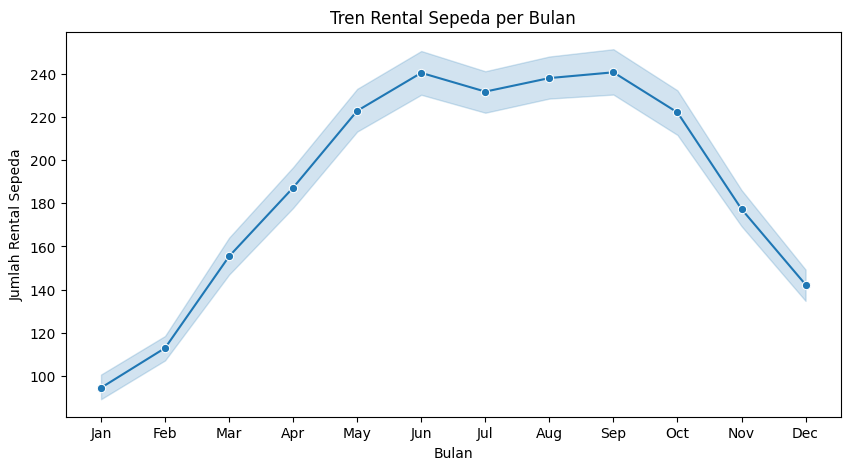

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="mnth", y="cnt", data=hour_df, marker="o")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Tren Rental Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Rental Sepeda")
plt.show()

**Tren Rental Sepeda per Bulan**

- Jumlah rental sepeda paling rendah terjadi pada awal dan akhir tahun, yaitu di bulan Januari dan Desember.
- Tren rental sepeda meningkat secara bertahap dari Januari hingga mencapai puncak pada bulan Juni hingga September.
- Setelah bulan September, jumlah rental sepeda mulai menurun hingga mencapai titik terendah kembali di bulan Desember.
- Faktor musiman berpengaruh terhadap pola ini, kemungkinan karena kondisi cuaca yang lebih mendukung aktivitas bersepeda pada pertengahan tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah penyewaan sepeda (cnt) antara hari kerja (workingday) dan hari libur (holiday)?


Rata-rata penyewaan sepeda pada hari kerja: 4584.82
Rata-rata penyewaan sepeda pada hari libur: 3735.00


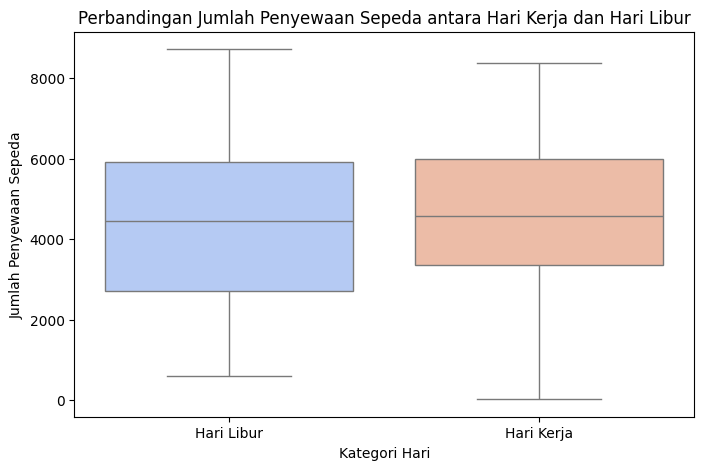

In [ ]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur
workday_avg = day_df.groupby("workingday")["cnt"].mean()
holiday_avg = day_df.groupby("holiday")["cnt"].mean()

print(f"Rata-rata penyewaan sepeda pada hari kerja: {workday_avg[1]:.2f}")
print(f"Rata-rata penyewaan sepeda pada hari libur: {holiday_avg[1]:.2f}")

# Visualisasi data
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="cnt", data=day_df, hue="workingday", palette="coolwarm", legend=False)
plt.xticks(ticks=[0, 1], labels=["Hari Libur", "Hari Kerja"])
plt.title("Perbandingan Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight**

- Semakin tinggi suhu, semakin banyak sepeda yang disewa, sesuai dengan garis regresi yang naik.
- Pada suhu rendah, jumlah rental lebih sedikit, menunjukkan bahwa cuaca dingin mengurangi minat pengguna.
- Ada variasi penyewaan meskipun suhu sama, kemungkinan karena faktor lain seperti hari kerja/libur atau kondisi cuaca lainnya.

### Pertanyaan 2: Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)? Apakah ada suhu tertentu di mana penyewaan meningkat atau menurun drastis?




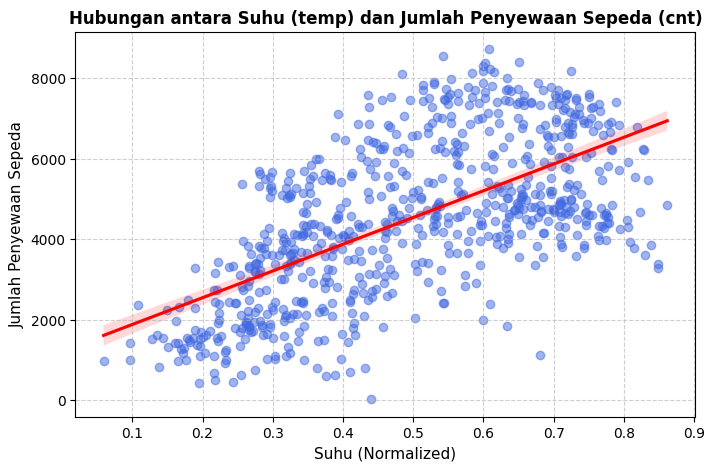

In [ ]:
# visualisasi scatter plot
plt.figure(figsize=(8, 5))
sns.regplot(x="temp", y="cnt", data=day_df, scatter_kws={"alpha": 0.5, "color": "royalblue"}, line_kws={"color": "red"})
plt.title("Hubungan antara Suhu (temp) dan Jumlah Penyewaan Sepeda (cnt)", fontsize=12, fontweight='bold')
plt.xlabel("Suhu (Normalized)", fontsize=11)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Insight**

- Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda, yang ditunjukkan oleh tren garis merah yang meningkat.
- Saat suhu meningkat, jumlah penyewaan sepeda juga cenderung bertambah.
- Penyewaan sepeda lebih rendah pada suhu rendah, kemungkinan karena cuaca dingin kurang nyaman untuk bersepeda.
- Pada suhu tinggi, penyewaan tetap tinggi tetapi mulai menyebar, menunjukkan bahwa faktor lain (misalnya kelembaban atau kenyamanan) juga dapat memengaruhi keputusan pengguna.
- Secara keseluruhan, cuaca hangat lebih mendorong aktivitas bersepeda dibandingkan cuaca dingin.

### Pertanyaan 3: Bagaimana tren penyewaan sepeda dari musim ke musim? Apakah ada pola tertentu setiap tahunnya?



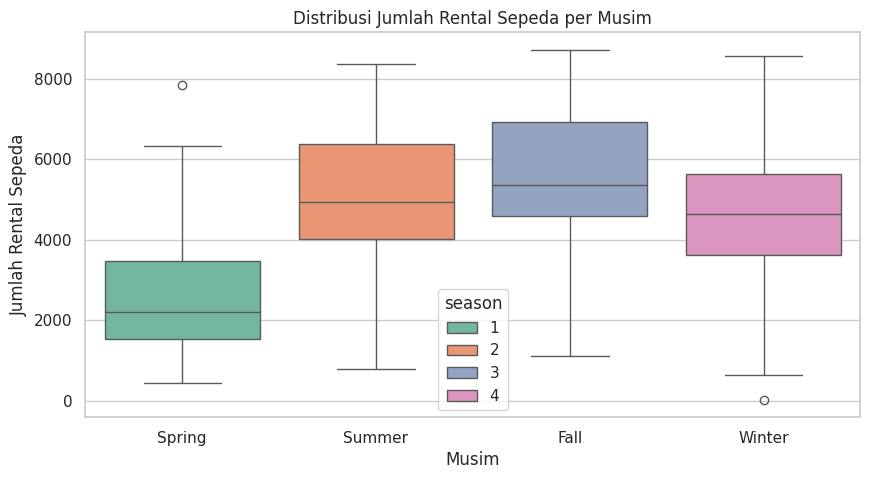

In [ ]:
# set style
sns.set(style="whitegrid")

# visualizing bike rentals per season
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df, hue="season", palette="Set2")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.title("Distribusi Jumlah Rental Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Rental Sepeda")
plt.show()

**Insight**
- Jumlah rental sepeda tertinggi terjadi pada musim gugur (Fall), kemungkinan karena cuaca yang nyaman untuk bersepeda.
- Musim semi (Spring) memiliki jumlah rental yang lebih rendah dibandingkan musim lainnya. Ini bisa jadi karena cuaca masih dingin atau sering hujan.
- Musim panas (Summer) dan musim dingin (Winter) menunjukkan tren rental yang cukup stabil, meskipun musim dingin cenderung lebih rendah dibanding musim lainnya.

Setiap tahun, pola ini cenderung berulang dengan lonjakan penyewaan di musim gugur dan penurunan signifikan di musim dingin.

### Pertanyaan 4: Apakah terdapat tren peningkatan penyewaan pada jam tertentu, misalnya sebelum atau setelah jam kerja/sekolah?

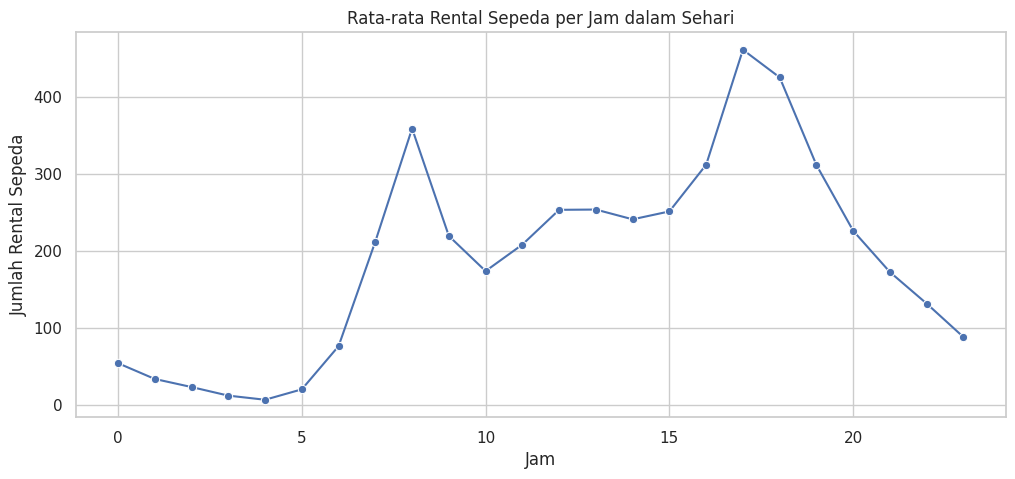

In [ ]:
# visualizing bike rentals by hour
plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", errorbar=None, marker="o")
plt.title("Rata-rata Rental Sepeda per Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Rental Sepeda")
plt.show()

**Insight**
- Rental sepeda meningkat drastis pada jam 7-9 pagi dan jam 17-19 sore, menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi utama saat berangkat dan pulang kerja.
- Pada akhir malam (setelah jam 20:00), jumlah rental turun drastis, yang bisa berarti penggunaan sepeda lebih sedikit untuk keperluan rekreasi atau pekerjaan larut malam.

### Pertanyaan 5: Apakah suhu (temp_day, atemp_day), kelembaban (hum_day), dan kecepatan angin (windspeed_day) berpengaruh terhadap jumlah peminjaman sepeda (cnt_day)?

In [ ]:
# menghitung ringkasan data hourly untuk dibandingkan dengan data harian
hourly_summary = hour_df.groupby("dteday").agg({
    "cnt": "sum",  # total peminjaman sepeda per hari
    "casual": "sum",
    "registered": "sum",
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

# menggabungkan dataset day.csv dengan ringkasan data dari hour.csv berdasarkan dteday
merged_df = pd.merge(day_df, hourly_summary, on="dteday", suffixes=("_day", "_hour"))

# menghitung korelasi antara faktor lingkungan dan jumlah peminjaman sepeda
correlation_matrix = merged_df[["temp_day", "atemp_day", "hum_day", "windspeed_day", "cnt_day"]].corr()

# menampilkan korelasi antara variabel lingkungan dengan jumlah peminjaman sepeda
correlation_matrix["cnt_day"]

,cnt_day
temp_day,0.627494
atemp_day,0.631066
hum_day,-0.100659
windspeed_day,-0.234545
cnt_day,1.000000


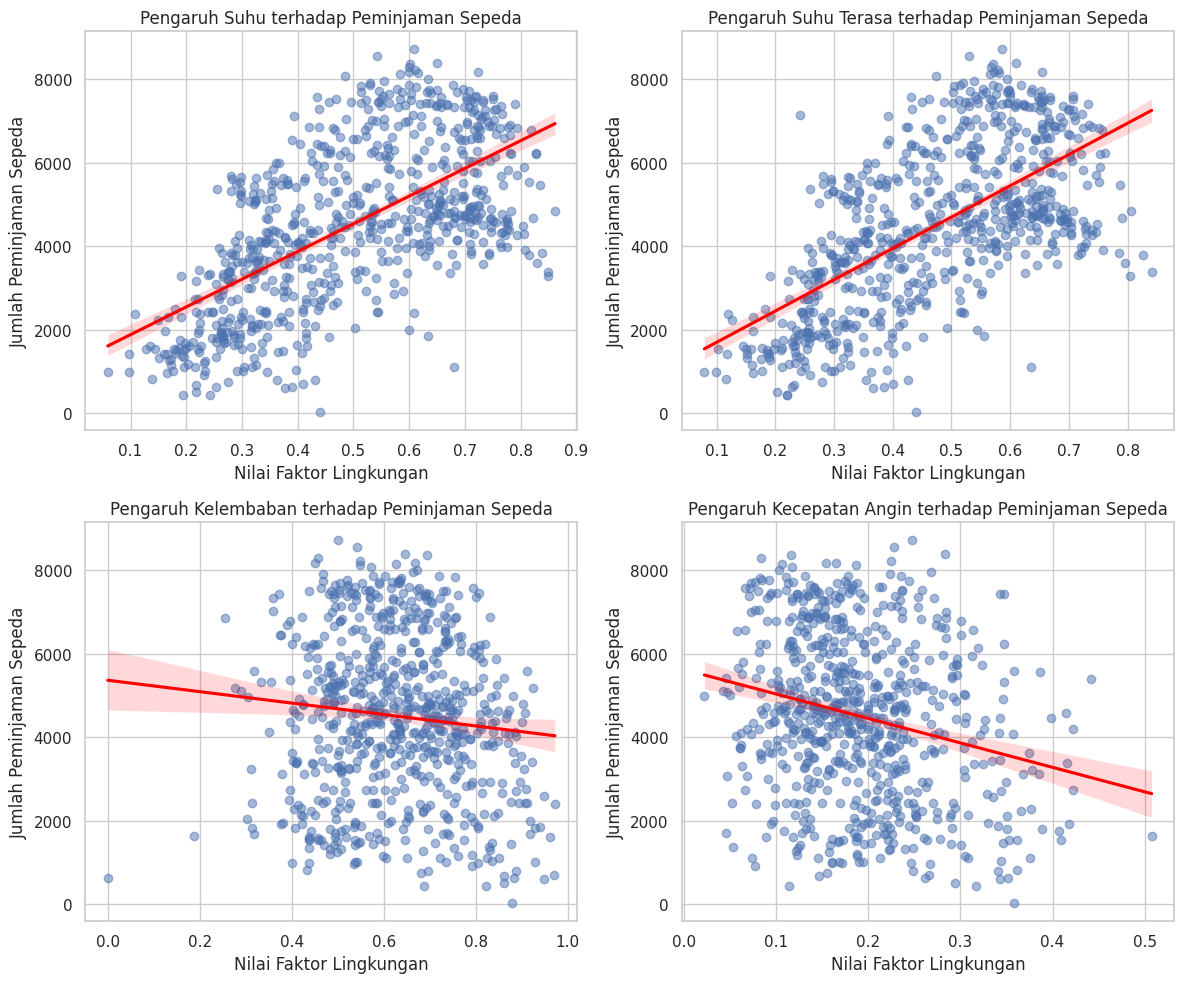

In [ ]:
# visualisasi data

# set style untuk visualisasi
sns.set_style("whitegrid")

# sembuat figure dengan beberapa subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# scatter plot dengan regresi untuk setiap faktor lingkungan terhadap cnt_day
sns.regplot(ax=axes[0, 0], x=merged_df["temp_day"], y=merged_df["cnt_day"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
axes[0, 0].set_title("Pengaruh Suhu terhadap Peminjaman Sepeda")

sns.regplot(ax=axes[0, 1], x=merged_df["atemp_day"], y=merged_df["cnt_day"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
axes[0, 1].set_title("Pengaruh Suhu Terasa terhadap Peminjaman Sepeda")

sns.regplot(ax=axes[1, 0], x=merged_df["hum_day"], y=merged_df["cnt_day"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
axes[1, 0].set_title("Pengaruh Kelembaban terhadap Peminjaman Sepeda")

sns.regplot(ax=axes[1, 1], x=merged_df["windspeed_day"], y=merged_df["cnt_day"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
axes[1, 1].set_title("Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda")

# menambahkan label sumbu
for ax in axes.flat:
    ax.set_xlabel("Nilai Faktor Lingkungan")
    ax.set_ylabel("Jumlah Peminjaman Sepeda")

# menampilkan plot
plt.tight_layout()
plt.show()


**Insight**

- Suhu (temp_day) dan suhu terasa (atemp_day) menunjukkan korelasi positif – semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Kelembaban (hum_day) memiliki pengaruh kecil terhadap peminjaman – grafik tidak menunjukkan tren yang jelas.
- Kecepatan angin (windspeed_day) memiliki sedikit efek negatif – semakin tinggi kecepatan angin, jumlah peminjaman sepeda cenderung sedikit menurun.

## Conclusion

- Conclution pertanyaan 1

  Suhu memiliki pengaruh positif terhadap jumlah penyewaan sepeda—semakin hangat cuaca, semakin banyak sepeda yang disewa. Namun, faktor lain seperti hari kerja/libur atau kondisi cuaca juga dapat memengaruhi jumlah penyewaan meskipun pada suhu yang sama.

- Conclution pertanyaan 2

  Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda, sementara suhu rendah mengurangi minat pengguna. Meskipun tren keseluruhan menunjukkan hubungan positif, faktor lain seperti kelembaban dan kenyamanan juga dapat memengaruhi keputusan pengguna dalam menyewa sepeda.

- Conclusion pertanyaan 3

  Pola penyewaan sepeda menunjukkan tren musiman yang konsisten setiap tahun. Musim gugur memiliki jumlah penyewaan tertinggi karena cuaca yang nyaman, sementara musim dingin mengalami penurunan signifikan akibat suhu dingin. Musim panas dan musim semi memiliki tren yang lebih stabil, dengan musim semi cenderung lebih rendah karena kemungkinan hujan atau suhu yang masih dingin.

- Conclusion pertanyaan 4

  Penyewaan sepeda mencapai puncaknya pada jam sibuk pagi dan sore hari, menandakan bahwa sepeda banyak digunakan sebagai transportasi untuk berangkat dan pulang kerja. Sementara itu, penyewaan menurun signifikan di malam hari, menunjukkan penggunaan sepeda yang lebih sedikit untuk aktivitas malam atau rekreasi.

- Conclusion pertanyaan 5

  Kondisi suhu lebih menentukan tren peminjaman sepeda dibandingkan kelembaban dan kecepatan angin. Hal ini bisa digunakan untuk perencanaan layanan sepeda berdasarkan prediksi cuaca, seperti meningkatkan ketersediaan sepeda di hari-hari dengan suhu nyaman.


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Simpan file ke Google Drive
merged_df.to_csv('/content/drive/MyDrive/all_data.csv', index=False)
print("Data merged telah disimpan ke all_data.csv di Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data merged telah disimpan ke all_data.csv di Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')